# Data exploration
## To do
- Ta ut riktig data fra værmeldingene: 12t skip 12t (Done)
- Summere total kraftproduksjon per vindretning

In [1]:
from platform import python_version
print(python_version())

3.6.8


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
# import datasets

forecast1 = pd.read_csv("Data/windforecasts_wf1.csv")
forecast2 = pd.read_csv("Data/windforecasts_wf2.csv")
forecast3 = pd.read_csv("Data/windforecasts_wf3.csv")
forecast4 = pd.read_csv("Data/windforecasts_wf4.csv")
forecast5 = pd.read_csv("Data/windforecasts_wf5.csv")
forecast6 = pd.read_csv("Data/windforecasts_wf6.csv")
forecast7 = pd.read_csv("Data/windforecasts_wf7.csv")
train = pd.read_csv("Data/train.csv")
benchmark = pd.read_csv("Data/benchmark.csv")

forecasts = [forecast1, forecast2, forecast3, forecast4, forecast5, forecast6, forecast7]
# Forecast structure: date hors u v ws wd
#train structure: date wp1 wp2 wp3 wp4 wp5 wp6 wp7

In [4]:
plot_titles = []
for i in range(7):
    plot_titles.append(f'Windfarm {i+1}')

plot_titles

['Windfarm 1',
 'Windfarm 2',
 'Windfarm 3',
 'Windfarm 4',
 'Windfarm 5',
 'Windfarm 6',
 'Windfarm 7']

In [5]:
forecast1

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13
5,2009070100,6,2.66,-1.29,2.96,115.79
6,2009070100,7,2.69,-0.81,2.81,106.71
7,2009070100,8,2.72,-0.26,2.73,95.39
8,2009070100,9,2.87,0.08,2.87,88.50
9,2009070100,10,3.23,-0.01,3.23,90.19


In [6]:
train.shape[0]

18757

In [7]:
train

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000
5,2009070105,0.035,0.011,0.099,0.066,0.015,0.013,0.000
6,2009070106,0.005,0.000,0.069,0.105,0.015,0.079,0.000
7,2009070107,0.000,0.011,0.000,0.017,0.025,0.013,0.025
8,2009070108,0.000,0.016,0.000,0.017,0.046,0.000,0.000
9,2009070109,0.010,0.000,0.000,0.006,0.081,0.000,0.000


In [8]:
#forecast1.iloc[:train.shape[0], 5 ]
forecast1.iloc[48:48+12, 5]

48    103.17
49    103.36
50    100.63
51     96.42
52     92.38
53     90.73
54     94.09
55    102.78
56    114.58
57    124.63
58    135.16
59    155.24
Name: wd, dtype: float64

Text(0.5, 1.0, 'Windfarm 1')

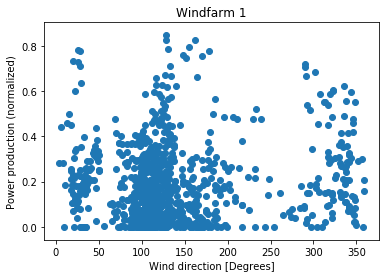

In [9]:
plt.scatter(forecast1.iloc[:1000, 5 ], train.iloc[:1000, 1])
plt.xlabel('Wind direction [Degrees]')
plt.ylabel('Power production (normalized)')
plt.title('Windfarm 1')

## Plotting function

In [10]:
def plot_power_vs_direction(name, dir_series, wp_series):
    plt.scatter(dir_series, wp_series)
    plt.xlabel('Wind direction')
    plt.ylabel('Power production')
    plt.title(name)

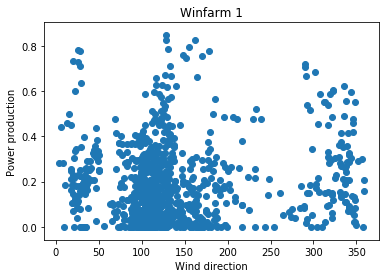

In [11]:
plot_power_vs_direction('Winfarm 1', forecast1.iloc[:1000,5], train.iloc[:1000,1])

In [12]:
forecasts[0].iloc[:10,5]

0    108.68
1    114.31
2    118.71
3    120.86
4    120.13
5    115.79
6    106.71
7     95.39
8     88.50
9     90.19
Name: wd, dtype: float64

# Data cleaning

In [13]:
forecast1.shape

(104832, 6)

In [14]:
# Extract correct wind predictions (wind directions):
forecast_array = np.array([])
forecast1.shape[0]
for k in range(len(forecasts)):
    for i in range(0, forecasts[k].shape[0], 48):
            for j in range(12):
                forecast_array = np.append(forecast_array,forecasts[k].iloc[i+j, 5])



## Remove overlapping and missing data
* remove overlapping data [Done]
____________________________________________________
* Convert date and time format of forecasts to equal prodution data


* First missing data: 2011.01.01.00 - 2011.01.03.01
* Second missing data: 2011.01.04.12 - 2011.01.06.13

Repeats every 7 days for the rest of the dataset

"The first period with missing observations is that from 2011/1/1 at 01:00 until 2011/1/3 at 00:00. The second period with missing observations is that from 2011/1/4 at 13:00 until 2011/1/6 at 12:00. Note that to be consistent, only the meteorological forecasts for that period that would actually be available in practice are given. These two periods then repeats every 7 days until the end of the dataset. Inbetween periods with missing data, power observations are available for updating the models."

Solve through:
1. forecast dataframe -> remove_overlap(df)
2. convert_dateformat(df)
3. df = df.loc[df['Date'].isin(train['date'])]


In [85]:
# Function to remove overlapping forecasts from a forecast stored in a panda dataframe:

def remove_overlap(forecast_df):
    array = np.array([])
    r, c = forecast_df.shape
    for k in range(forecast_df.shape[1]):
        for i in range(0, forecast_df.shape[0], 48):
            for j in range(12):
                array = np.append(array, forecast_df.iloc[i+j, k])
    array2 = np.resize(array, (c, int(array.shape[0]/c)))
    fdict = {'Date': array2[0].astype(int), 'Hour': array2[1], 'u': array2[2], 'v': array2[3], 'wind_speed': array2[4], 'wind_dir': array2[5]}
    df = pd.DataFrame(data=fdict)
    return df

In [86]:
test = remove_overlap(forecast1)

In [87]:
test

,Date,Hour,u,v,wind_speed,wind_dir
0,2009070100,1.0,2.34,-0.79,2.47,108.68
1,2009070100,2.0,2.18,-0.99,2.40,114.31
2,2009070100,3.0,2.20,-1.21,2.51,118.71
3,2009070100,4.0,2.35,-1.40,2.73,120.86
4,2009070100,5.0,2.53,-1.47,2.93,120.13
5,2009070100,6.0,2.66,-1.29,2.96,115.79
6,2009070100,7.0,2.69,-0.81,2.81,106.71
7,2009070100,8.0,2.72,-0.26,2.73,95.39
8,2009070100,9.0,2.87,0.08,2.87,88.50
9,2009070100,10.0,3.23,-0.01,3.23,90.19


In [19]:
forecast_array.shape[0]/7

26208.0

In [20]:
# Splitting back into the 7 windfarms:
forecast_array2 = np.resize(forecast_array, (7,int(forecast_array.shape[0]/7)))

In [21]:
#forecast_array2[1][:12]

In [22]:
#forecast2.iloc[:12,5]

In [23]:
# Test om dataene har samme form:
print(forecast1.shape, forecast2.shape, forecast3.shape, forecast4.shape, forecast5.shape, forecast6.shape, forecast7.shape)

(104832, 6) (104832, 6) (104832, 6) (104832, 6) (104832, 6) (104832, 6) (104832, 6)


In [24]:
fdict = {'wf1': forecast_array2[0], 'wf2': forecast_array2[1], 'wf3': forecast_array2[2], 'wf4': forecast_array2[3], 'wf5': forecast_array2[4],
        'wf6': forecast_array2[5], 'wf7': forecast_array2[6]}
dfForecast = pd.DataFrame(data=fdict)
dfForecast

,wf1,wf2,wf3,wf4,wf5,wf6,wf7
0,108.68,120.20,124.75,124.27,340.24,135.19,139.09
1,114.31,121.76,125.63,121.07,333.88,135.04,140.26
2,118.71,124.85,129.29,120.49,332.41,134.75,140.15
3,120.86,129.09,135.14,121.62,334.53,134.45,139.26
4,120.13,132.96,140.85,123.22,338.51,134.63,138.73
5,115.79,134.05,143.52,124.11,343.08,136.00,140.00
6,106.71,130.46,141.17,123.27,347.56,139.06,144.27
7,95.39,124.72,136.20,120.18,351.12,142.21,149.72
8,88.50,121.38,133.67,114.74,352.58,142.21,152.18
9,90.19,123.11,137.08,108.32,351.58,136.34,147.59


# Plot vindretning vs  kraftproduksjon

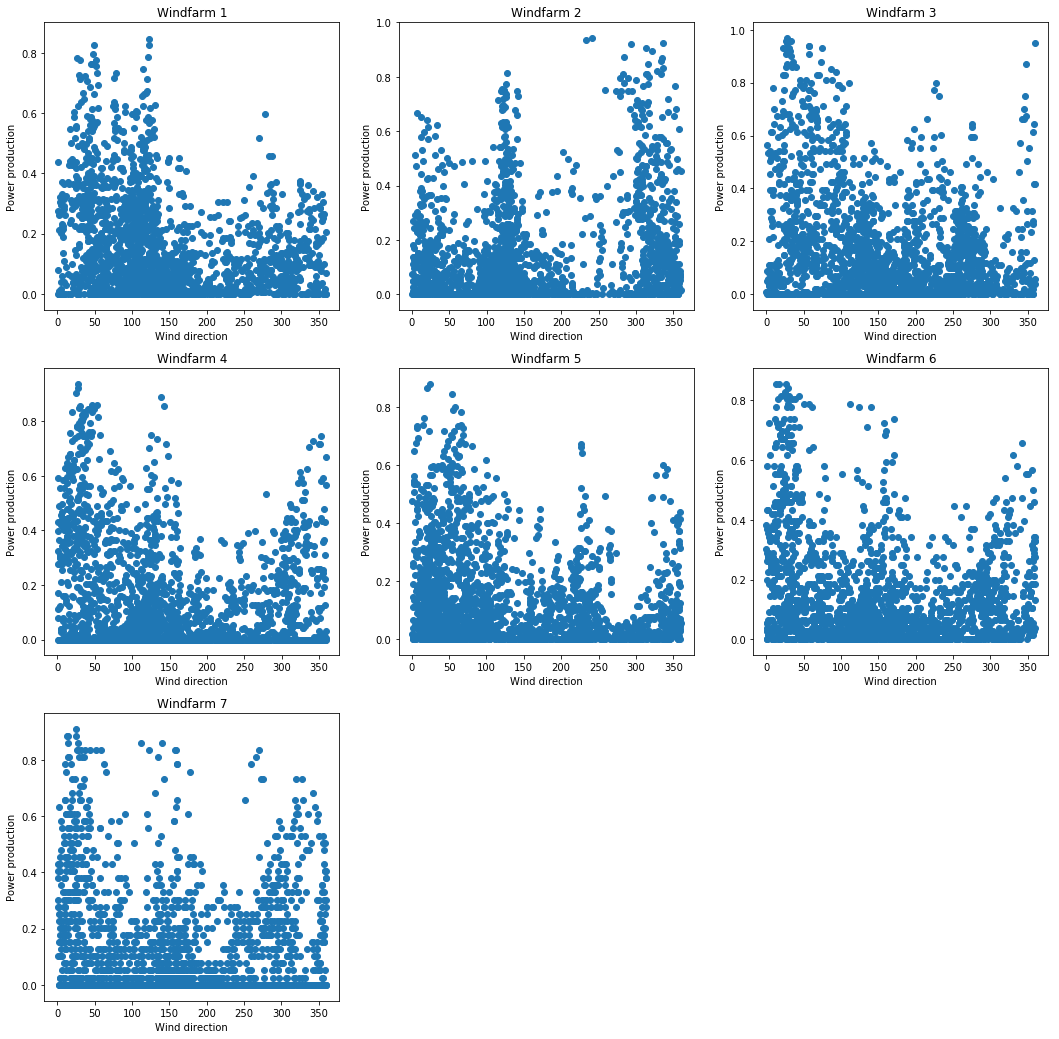

In [25]:
# Plot kraftproduksjon vs vindretning for alle vindparkene:

num_rows = 3
num_cols = 3
num_plots = 7
datapoints = 2000
plt.figure(figsize=(6*num_cols, 6*num_rows))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    plot_power_vs_direction(plot_titles[i], dfForecast.iloc[:datapoints,i], train.iloc[:datapoints, i+1])
    

In [26]:
dfForecast

,wf1,wf2,wf3,wf4,wf5,wf6,wf7
0,108.68,120.20,124.75,124.27,340.24,135.19,139.09
1,114.31,121.76,125.63,121.07,333.88,135.04,140.26
2,118.71,124.85,129.29,120.49,332.41,134.75,140.15
3,120.86,129.09,135.14,121.62,334.53,134.45,139.26
4,120.13,132.96,140.85,123.22,338.51,134.63,138.73
5,115.79,134.05,143.52,124.11,343.08,136.00,140.00
6,106.71,130.46,141.17,123.27,347.56,139.06,144.27
7,95.39,124.72,136.20,120.18,351.12,142.21,149.72
8,88.50,121.38,133.67,114.74,352.58,142.21,152.18
9,90.19,123.11,137.08,108.32,351.58,136.34,147.59


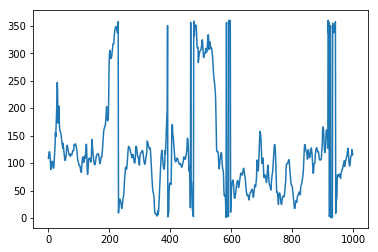

In [27]:
# Plot av vindretning første x timene
plt.plot(dfForecast.iloc[:1000,0])

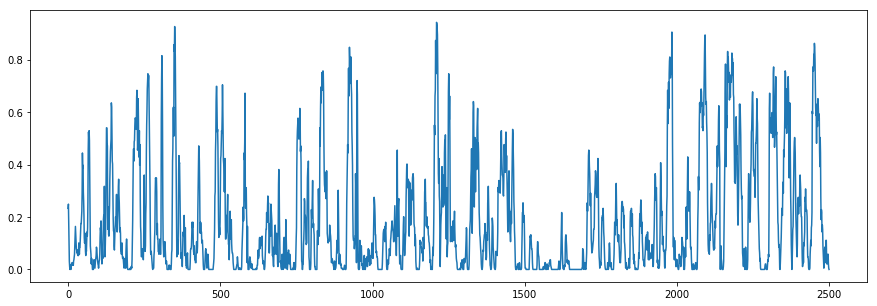

In [28]:
plt.figure(figsize=(15,5))
plt.plot(train.iloc[:2500, 2])


In [33]:
# Run this on regular part: inrement i by 84, append array[i+47:i+83] (evt. i+48:i+84)
test2 = np.array([])
for i in range(0, len(testarray),5):
    test2 = np.append(test2, testarray[i:i+3])
test2

array([1., 2., 3., 6., 7., 8.])

In [38]:
##  Fortsatt noe feil. Train datasettet mangler mye mer data

test2 = np.array([])
for i in range(0, 500, 84):
    print(i)
    test2 = np.append(test2, test1.iloc[i+48:i+84,0], 0)

test2 = test2.astype(int)
test2

0
84
168
252
336
420


array([2011010300, 2011010300, 2011010300, 2011010300, 2011010300,
       2011010300, 2011010300, 2011010300, 2011010300, 2011010300,
       2011010300, 2011010300, 2011010312, 2011010312, 2011010312,
       2011010312, 2011010312, 2011010312, 2011010312, 2011010312,
       2011010312, 2011010312, 2011010312, 2011010312, 2011010400,
       2011010400, 2011010400, 2011010400, 2011010400, 2011010400,
       2011010400, 2011010400, 2011010400, 2011010400, 2011010400,
       2011010400, 2011010612, 2011010612, 2011010612, 2011010612,
       2011010612, 2011010612, 2011010612, 2011010612, 2011010612,
       2011010612, 2011010612, 2011010612, 2011010700, 2011010700,
       2011010700, 2011010700, 2011010700, 2011010700, 2011010700,
       2011010700, 2011010700, 2011010700, 2011010700, 2011010700,
       2011010712, 2011010712, 2011010712, 2011010712, 2011010712,
       2011010712, 2011010712, 2011010712, 2011010712, 2011010712,
       2011010712, 2011010712, 2011011000, 2011011000, 2011011

## Extract dates that are in train dataset from forecasts
### Make equal date format

In [73]:
def convert_date_format(forecast_dataframe):
    for i in range (forecast_dataframe.shape[0]):
        # Fetch the date in its original format:
        prev_date = str(forecast_dataframe.iloc[i,0])
        forecast_hour = int(prev_date[-2:])
        
        # Fetch the hour the forecast is for:
        # FIX THIS: 1-12 INSTEAD OF 0-23
        hours_ahead = int(forecast_dataframe.iloc[i,1])
        hour = str(forecast_hour + hours_ahead).zfill(2)
        
        # Strip the hours the forecast was made
        date = prev_date[:-2]
        
        #append the hour the forecast is for at the end of the date:
        date_time = date + hour
        
        # Replace the date with the new date format:
        forecast_dataframe.iloc[i,0] = date_time
    
    return forecast_dataframe

In [88]:
funcTest = convert_date_format(test)

In [89]:
funcTest.iloc[:40,:]

,Date,Hour,u,v,wind_speed,wind_dir
0,2009070101,1.0,2.34,-0.79,2.47,108.68
1,2009070102,2.0,2.18,-0.99,2.40,114.31
2,2009070103,3.0,2.20,-1.21,2.51,118.71
3,2009070104,4.0,2.35,-1.40,2.73,120.86
4,2009070105,5.0,2.53,-1.47,2.93,120.13
5,2009070106,6.0,2.66,-1.29,2.96,115.79
6,2009070107,7.0,2.69,-0.81,2.81,106.71
7,2009070108,8.0,2.72,-0.26,2.73,95.39
8,2009070109,9.0,2.87,0.08,2.87,88.50
9,2009070110,10.0,3.23,-0.01,3.23,90.19


In [90]:
forecast1.iloc[:40,:]

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13
5,2009070100,6,2.66,-1.29,2.96,115.79
6,2009070100,7,2.69,-0.81,2.81,106.71
7,2009070100,8,2.72,-0.26,2.73,95.39
8,2009070100,9,2.87,0.08,2.87,88.50
9,2009070100,10,3.23,-0.01,3.23,90.19


In [75]:
funcTest.iloc[:30,:]

,Date,Hour,u,v,wind_speed,wind_dir
6,2009070121,7.0,2.69,-0.81,2.81,106.71
7,2009070124,8.0,2.72,-0.26,2.73,95.39
8,2009070127,9.0,2.87,0.08,2.87,88.50
9,2009070130,10.0,3.23,-0.01,3.23,90.19
10,2009070133,11.0,3.65,-0.33,3.66,95.15
11,2009070136,12.0,3.89,-0.60,3.94,98.71
12,200907013,1.0,2.77,-0.65,2.85,103.17
13,200907016,2.0,3.12,-0.74,3.20,103.36
14,200907019,3.0,3.29,-0.62,3.35,100.63
15,200907022,4.0,3.31,-0.37,3.33,96.42


In [76]:
test

,Date,Hour,u,v,wind_speed,wind_dir
6,2009070121,7.0,2.69,-0.81,2.81,106.71
7,2009070124,8.0,2.72,-0.26,2.73,95.39
8,2009070127,9.0,2.87,0.08,2.87,88.50
9,2009070130,10.0,3.23,-0.01,3.23,90.19
10,2009070133,11.0,3.65,-0.33,3.66,95.15
11,2009070136,12.0,3.89,-0.60,3.94,98.71
12,200907013,1.0,2.77,-0.65,2.85,103.17
13,200907016,2.0,3.12,-0.74,3.20,103.36
14,200907019,3.0,3.29,-0.62,3.35,100.63
15,200907022,4.0,3.31,-0.37,3.33,96.42


### Filter out the dates we have production data:

In [44]:
test.loc[test['Date'].isin(train['date'])]

,Date,Hour,u,v,wind_speed,wind_dir


In [62]:
train['date'] = train['date'].apply(str)

In [63]:
train.dtypes

date     object
wp1     float64
wp2     float64
wp3     float64
wp4     float64
wp5     float64
wp6     float64
wp7     float64
dtype: object

In [68]:
train['date'][13][-2:]

'13'

In [47]:
train.describe

<bound method NDFrame.describe of              date    wp1    wp2    wp3    wp4    wp5    wp6    wp7
0      2009070100  0.045  0.233  0.494  0.105  0.056  0.118  0.051
1      2009070101  0.085  0.249  0.257  0.105  0.066  0.066  0.051
2      2009070102  0.020  0.175  0.178  0.033  0.015  0.026  0.000
3      2009070103  0.060  0.085  0.109  0.022  0.010  0.013  0.000
4      2009070104  0.045  0.032  0.079  0.039  0.010  0.000  0.000
5      2009070105  0.035  0.011  0.099  0.066  0.015  0.013  0.000
6      2009070106  0.005  0.000  0.069  0.105  0.015  0.079  0.000
7      2009070107  0.000  0.011  0.000  0.017  0.025  0.013  0.025
8      2009070108  0.000  0.016  0.000  0.017  0.046  0.000  0.000
9      2009070109  0.010  0.000  0.000  0.006  0.081  0.000  0.000
10     2009070110  0.025  0.005  0.000  0.000  0.101  0.000  0.000
11     2009070111  0.030  0.021  0.000  0.000  0.111  0.000  0.000
12     2009070112  0.010  0.021  0.000  0.000  0.121  0.000  0.000
13     2009070113  0.000  0.